# Homework Set Week 5
## insert your name here

In this homework assignment please fill the indicated cells with your code and explainations, ***run*** everything (select `cell` in the menu, and click `Run all`), save the notebook with your name appended to the filename (for example, `Homework-05-caos.ipynb`), and upload it to canvas.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Problem 1: Monte-Carlo approximation of $\pi$

Use function in the `numpy.random` module to generate $N = 10000$ samples of points $(x,y)$, in which each coordinate is uniformly random distributed in the interval $(0,1)$. Estimate $\pi$ by computing the fraction of points that are within the circle defined by $x^2 + y^2 = 1$. The $\pi/4$ can be then estimated by the ratio of the points in the circle to the total number of points.

In [ ]:
# your code here to estimate pi/4, you can use for loops but a vectorized implementation is prefered

After you have done so, use `X_out`, `Y_out` to record the points' coordinates outside the circle, and `X_in`, `Y_in` to record the points inside the circle. Run the cell below the image to generate a diagram (when you have 1000 points, the diagram should look similar to this image):

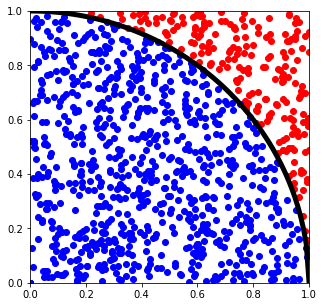

In [2]:
from IPython.display import Image, display 
display(Image('monte_carlo.png')) 

In [ ]:
x = np.linspace(0,1,100)
y = (lambda x: np.sqrt(1-x**2))(x)
plt.figure(figsize=(5,5))
plt.scatter(X_out, Y_out, color = 'red')
plt.scatter(X_in, Y_in, color = 'blue')
plt.plot(x, y, color='black', linewidth = 5)
plt.axis([0, 1, 0, 1])
plt.show()

# Problem 2 Implementing a stopping criterion for GD
In vector calculus, we generalize the concept of the derivative as the gradient. For a single variable function $\nabla f = f'$.
<br><br>
The gradient is the derivative of a function of all of its variables. We use the gradient in order to create a directional derivative. The directional derivative gives us both a direction and magnitute of "how steep" the function is at that point and facing that direction. Following the directional derivatives we can find the minimum (or maximum) value of a function.
<br><br>
Following the gradient, or so-called **gradient descent**, is a commonly-used **first order** optimization algorithm for finding the local minimum of a function. To find a local minimum, the function "steps" in the  direction of the negative of the gradient. The algorithm of gradient descent can be outlined as follows:

> Choose initial guess $x_0$, step size (learning rate) $\eta$, number of iterations $M$ <br>
>  &nbsp;&nbsp; for $k = 0, 1, 2, \dots, M $ </b> <br>
>  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    $x_{k+1} = x_k - \eta f'(x_k)$ <br>


In this homework, we are supposed find a local minimum for the function $f(x) = x^3-2x^2+2$

In [ ]:
# run this cell to plot f(x)
# define f
f = lambda x: x**3-2*x**2+2
xs = np.linspace(-1,2.5,1000)
plt.figure(figsize= [8,4])
plt.plot(xs, f(xs),linewidth = 2)
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.grid(True, linestyle = 'dashed')
plt.show()

We can see from plot above that our local minimum is gonna be achieved near around 1.3 on the $x$-axis (you can solve the $f'=0$), but let's pretend that we don't know that, so we set our starting point at $x_0 = 2$

In [ ]:
# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x

x = 2 # initial guess
eta = 0.1 # step size
num_steps = 200 # iterations

x_vals = np.zeros(num_steps)
f_vals = np.zeros(num_steps)

for i in range(num_steps):
    x_vals[i] = x
    f_vals[i] = f(x)
    df = f_prime(x)
    x -= eta*df

    
print("After %s iterations f(x) is %.4f at %.7f. " %(num_steps, f(x), x))

In [ ]:
plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
plt.plot(x_vals,f_vals,'-ro', markersize=5)
plt.plot(xs,f(xs), color='blue', linewidth = 2)
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.title("Gradient descent")
plt.grid(True, linestyle = 'dashed')

plt.subplot(1,2,2)
plt.plot(x_vals,f_vals,'-ro', markersize=5)
plt.plot(xs,f(xs), color='blue')
plt.xlim([1.2,2.1])
plt.ylim([.7,2.1])
plt.title("Gradient descent (zoomed in)")
plt.grid(True, linestyle = 'dashed')
plt.show()

## Reading: Why do we follow the negative gradient? 

If we calculate the directional derivative:
$D_{\mathbf{u}}(f) =  \nabla f\cdot \mathbf{u}$, where $\mathbf{u}$ is the unit vector in the direction we care about.

$|\cdot|$ indicates magnitute of the vector. The magnitute of the directional derivative gives us the rate of change of movement in that direction. Now 
$$D_{\mathbf{u}}(f) = \nabla f\cdot \mathbf{u}= |\nabla f| \cdot |\mathbf{u}| \cdot \cos(\theta),$$ 
where $\theta$ is the angle between the two vectors. Since $u$ is a unit vector, so $D_{\mathbf{u}}(f) = |\nabla f|\cos(\theta)$. 

The extreme values of this directional derivative occur when the $\cos(\theta) = \pm 1$ when $\theta=0, \pi$ therefore when the vector $\mathbf{u}$ is either in the same direction as, or opposite to $\nabla f$.
The maximum of $D_{\mathbf{u}}(f) $ is therefore given by $|D_{\mathbf{u}}(f)|$, and will occur in the direction given by $\nabla f(x)$ (the direction that $f$ increases fastest); while the direction of $-\nabla f(x)$ makes this function decrease the fastest.


## Question for Problem 2
If you check the convergence of `x_vals` and `f_vals`, you will find that after several iterations, `x_vals` is already very close to the true minimum point's $x$-coordinate. Using 200 steps is relatively wasteful of computational resources for this simple problem. In the first question below, we are going to implement a **stopping criterion**, that is:

> At the $(k+1)$-th iteration, if $|x_{k+1} - x_{k}| < \text{Tol} $, where $\text{Tol} $ is a tolerance the user sets, then the gradient descent stops and returns $x_{k+1}$.

* Rewrite the script above into a function using the initial guess, step size, tolerance for stopping criterion, maximum no. of steps $M$ (if the tolerance is not reached after this number the GD stops and returns $x_M$), and the exact gradient lambda function as inputs, which returns the sequence of `x_vals` and `f_vals` at each iterations.

* Try changing the initial guess to a negative number, for example $x_0 = -3$, and varying step sizes to 1 and 1e-2, does the algorithm converge to the same local extremum or converge at all? Why?

In [ ]:
# your gradient descent function here
def grad_descent(f_prime, x0, eta, num_steps = 100, tol = 1e-5):
    # something something to replace pass
    pass

In [ ]:
# testing the original example making sure it works
x_vals, f_vals =  grad_descent(f_prime, 2, eta = 1e-1, num_steps = 200, tol = 1e-5)

In [ ]:
# testing different step size and x0=-3